# Datasets 

First dataset: Unemployment Rate in West Midlands from 1992 April to 2022 April (https://www.ons.gov.uk/employmentandlabourmarket/peoplenotinwork/unemployment/timeseries/ycng/lms)

Second dataset: Estimated domestic abuse as percentage of victims from March 2005 to March 2020
(https://www.ons.gov.uk/peoplepopulationandcommunity/crimeandjustice/bulletins/domesticabuseinenglandandwalesoverview/november2020)

Third dataset: Deaths related to drug poisoning by date of occurrence from 1993 to 2018
https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathsrelatedtodrugpoisoningbydateofoccurrence

Fourth dataset: Population West Midlands from 1950 to 2037
https://www.macrotrends.net/cities/22835/west-midlands/population#:~:text=The%20metro%20area%20population%20of,a%200.74%25%20increase%20from%202018.

     Year   Population
0  1950.0    2229000.0
1  1951.0    2240000.0
2  1952.0    2250000.0
3  1953.0    2261000.0
4  1954.0    2272000.0
     Year  Domestic Abuse Incidents as Percentage of Population
0  2005.0                                                8.9   
1  2006.0                                                9.0   
2  2007.0                                                8.8   
3  2008.0                                                NaN   
4  2009.0                                                6.5   
     Year  Unemployment Rate
0  1992.0               11.0
1  1993.0               11.7
2  1994.0                9.7
3  1995.0                8.7
4  1996.0                8.5


<AxesSubplot:xlabel='Year'>

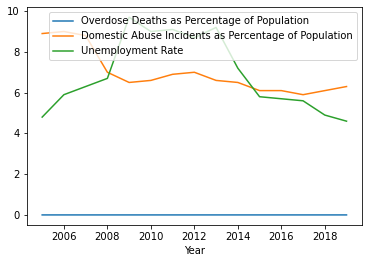

In [87]:
import pandas as pd
import matplotlib as plt
import openpyxl
import seaborn as sns

df_population = pd.read_csv(r'\Users\feror\OneDrive\Documents\Applied Data Science UoM\Course 2\week 4\Datasets\WM_population.csv')

#First, drop header info, then rename columns to first row of usable data from csv file and drop this row. Rename date column 
#to Year, and remove the day and month data using regex so its just year info. An alternative method to do this would be to 
#convert this column to 
#Currently from 1950 to 2035. TODO: Method chain
df_population = df_population.iloc[14:,:-1]

df_population = (df_population
                 .rename(columns = df_population.iloc[0])
                 .drop(df_population.index[0], axis = 0)
                 .rename(columns = {'date':'Year'})
                 .replace(to_replace = ['^(\d*)/(\d*)/'], value = '', regex = True)
                 .reset_index(drop = True)
                 .astype(float)
                )

print(df_population.head())

df_abuse = pd.read_csv(r'C:\Users\feror\OneDrive\Documents\Applied Data Science UoM\Course 2\week 4\Datasets\WM_domestic_abuse.csv')

#First drop header, rename columns, then use regex to convert from three letter month names to year. This could be done through
#datetime conversion and manipulation, but in regex its just one line of code. 

df_abuse = (df_abuse
            .iloc[6:, :2]
            .rename(columns = {df_abuse.columns[0]:'Year', 
                                     df_abuse.columns[1]:'Domestic Abuse Incidents as Percentage of Population'})
            .replace(to_replace = ['.*-'], value = '20', regex = True)
            .reset_index(drop = True)
            .astype(float)
           )

print(df_abuse.head())

df_unemployment = pd.read_csv(r'C:\Users\feror\OneDrive\Documents\Applied Data Science UoM\Course 2\week 4\Datasets\WM_unemployment.csv')
df_unemployment = (df_unemployment
                   .iloc[7:37]
                   .rename(columns = {df_unemployment.columns[0]:'Year',
                                     df_unemployment.columns[1]:'Unemployment Rate'})
                   .reset_index(drop = True)
                   .astype(float)
                  )

print(df_unemployment.head())

df_overdoses = pd.read_excel(r'C:\Users\feror\OneDrive\Documents\Applied Data Science UoM\Course 2\week 4\Datasets\WM_drug_overdose.xlsx', sheet_name = 'Table 5', engine = 'openpyxl')

df_overdoses = (df_overdoses
               .iloc[8: , :5]
               .drop([df_overdoses.columns[1], df_overdoses.columns[2]], axis = 1)
               .rename(columns = {df_overdoses.columns[0]:'Year',
                                             df_overdoses.columns[3]:'Area Name',
                                             df_overdoses.columns[4]:'Deaths by overdoses'})
               .fillna(method = 'ffill'))

#Here we are filtering the DataFrame by region so we only get West Midlands data. Then we convert the Year column to integer
#the merge method requires the columns being morged on to be the same data type. I also noticed that the dataset had added 
#a space to the Population column at the start (so it was " Population") which made returned errors when I called the column 
#data later, so I fixed this. Finally, I made a new column which gave the Overdose Deaths as Percentage of Population.
df_overdoses = df_overdoses[df_overdoses['Area Name'] == 'West Midlands']
df_overdoses['Year'] = df_overdoses['Year'].astype(int)
df_overdoses = pd.merge(df_overdoses, df_population, how = 'inner', on = 'Year')
df_overdoses = df_overdoses.rename(columns = {df_overdoses.columns[-1]:'Population'})
df_overdoses['Population'] = df_overdoses['Population'].astype(str).astype(float)
df_overdoses['Overdose Deaths as Percentage of Population'] = df_overdoses['Deaths by overdoses']/df_overdoses['Population'].astype(int)
df_overdoses = df_overdoses.iloc[:,[0,-1]]

df = pd.merge(df_overdoses, df_abuse, how = 'inner', on = 'Year')
df = pd.merge(df, df_unemployment, how = 'inner', on = 'Year')
df = df.set_index('Year')
df.loc[2008][-2] = 7
df.plot()